<a href="https://colab.research.google.com/github/EshwarDhande/EshwarDhande/blob/main/%5B23210038%5D_ES666_Assignment_1_Can_you_Solve_The_Mystery_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

### Prologue

Welcome to the Computer Vision Assignment Nagar (CVAN), where everyone has to solve some set of problems to go from location A to location B. There are total 5 places (A, B, C, D, E) in the CVAN with equally distributed rewards.
<br/><br/>
After visiting all the 5 places you will able to reach a glorious palce ResultPura (RP).
<br/><br/>
Prof. Shanmuganathan Raman is Time Variant Authority (TVA) of this universe, if found you copying the assignment or exam or any malpractice then instead of reaching ResultPura you will reach ZeroPura.
<br/><br/>
<b>Special fact about CVAN is you have to solve everything with some vision algorithm.</b>

### Task

You are currently at place A. Your task is to solve series of questions given below which will lead you to the final task of solving a JigSaw puzzle mystery. Someone has altered the reality of CVAN and makes changes in the vision algorithm of the brain and because of it everyone is now observing real world as jigsaw images in their vision and causing chaos in their daily life.
<br/><br/>
<b>Note: Only you can save them by not copying the assignment from others and but you can discuss with your friends.</b>

# Task

### Pre-defined code

In [ ]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

# Downloading all the required libraries


# Importing all the required libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import style
from glob import glob
from natsort import natsorted
from tqdm import tqdm
style.use('ggplot')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading all the images in the drive
gt_images = []

for files in tqdm(natsorted(glob('/content/drive/My Drive/ES666CV/images/A/*'))):
    gt_images.append(cv2.imread(files, 1))

gt_images = np.array(gt_images) # Only possible because all images are of same size

100%|██████████| 4/4 [00:00<00:00, 123.63it/s]


In [ ]:
def show_image_grid(images, M, N, title='Title'):
    # Assuming 'images' is a numpy array of shape (num_images, height, width, channels)
    fig, axes = plt.subplots(M, N, figsize=(N * 2, M * 2))

    if len(images.shape) < 4:
        images = np.expand_dims(images.copy(), axis=0)

    fig.suptitle(title)
    for i in range(M):
        for j in range(N):
            if M==1 and N==1:
                ax = axes
            elif M == 1 or N==1:
                ax = axes[max(i, j)]
            else:
                ax = axes[i, j]
            index = i * N + j
            if index < images.shape[0]:
                ax.imshow(cv2.cvtColor(images[index], cv2.COLOR_BGR2RGB))
            ax.axis('off')
    plt.tight_layout()
    plt.show()

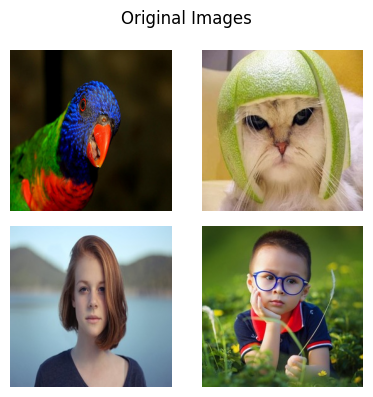

In [ ]:
show_image_grid(gt_images, 2, 2, 'Original Images')

### Q1 [2 Marks]

Given some set of images, you have to add two different kind of noises to it.
* Impulse noise (Salt and Pepper noise)
* Gaussian noise

<br/>
<b>Note: Implement all the noise addition algorithm from scratch.</b> You can use numpy library for convolution and other methods.
<br/><br/>
Add noises in small amount so that not all the information in image is changes.
<br/><br/>
Also please vary the parameters of noise and display images accordingly.

In [ ]:
def add_impulse_noise(image, noise_prob):
    """
    Add Salt and Pepper noise to an image with a fixed salt-to-pepper ratio of 0.5.

    Parameters:
    image (numpy array): The original image to which noise will be added.
    noise_prob (float): Probability of altering each pixel. This determines the total amount of noise.

    Returns:
    numpy array: Noisy image with Salt and Pepper noise added.
    """

    # Fixed salt ratio
    salt_ratio = 0.5

    # Copy the image to avoid modifying the original
    noisy_image = np.copy(image)

    # Calculate the total number of pixels in the image
    total_pixels = image.size // image.shape[2]  # Divide by number of channels for total pixels

    # Calculate the number of noisy pixels based on the noise probability
    num_noisy_pixels = int(noise_prob * total_pixels)

    # Calculate the number of salt (white) and pepper (black) pixels
    num_salt = int(num_noisy_pixels * salt_ratio)
    num_pepper = num_noisy_pixels - num_salt  # Remaining noise will be pepper

    # Generate random coordinates for the entire noise
    coords = [np.random.randint(0, i, num_noisy_pixels) for i in image.shape]

    # Shuffle the indices to ensure randomness
    indices = np.arange(num_noisy_pixels)
    np.random.shuffle(indices)

    # Apply salt (white) noise
    salt_indices = indices[:num_salt]
    salt_coords = [coord[salt_indices] for coord in coords]
    noisy_image[salt_coords[0], salt_coords[1], :] = 255  # Set salt pixels to white

    # Apply pepper (black) noise
    pepper_indices = indices[num_salt:]
    pepper_coords = [coord[pepper_indices] for coord in coords]
    noisy_image[pepper_coords[0], pepper_coords[1], :] = 0  # Set pepper pixels to black

    return noisy_image


In [ ]:
def add_gaussian_noise(image, mean, std):
    """
    Add Gaussian noise to an image.

    Parameters:
    image (numpy array): The original image to which noise will be added.
    mean (float): Mean of the Gaussian distribution.
    std (float): Standard deviation of the Gaussian distribution.

    Returns:
    numpy array: Noisy image with Gaussian noise added.
    """

    gaussian_noise = np.random.normal(mean, std, image.shape)
    noisy_image = image + gaussian_noise
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

    return noisy_image


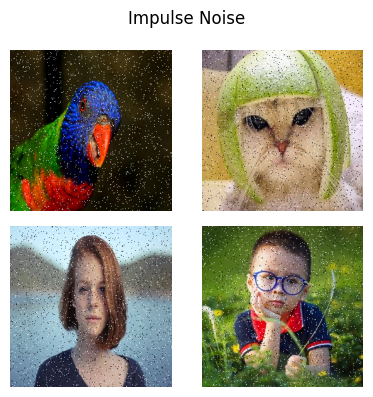

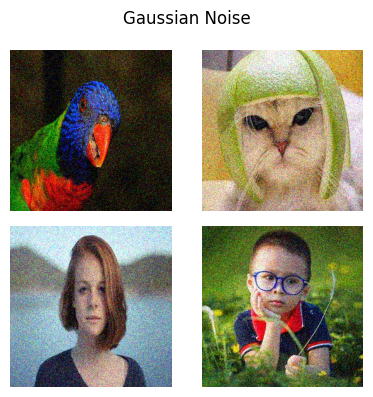

In [ ]:
# Write code here
impulse_noisy_images  = []
gaussian_noisy_images = []

# Write code here for variation in noise parameter

for image in gt_images:
    impulse_noisy_images.append(add_impulse_noise(image, noise_prob=0.05))
    gaussian_noisy_images.append(add_gaussian_noise(image, mean=0., std=30))

impulse_noisy_images = np.array(impulse_noisy_images)
gaussian_noisy_images = np.array(gaussian_noisy_images)

show_image_grid(impulse_noisy_images, M=2, N=2, title='Impulse Noise')
show_image_grid(gaussian_noisy_images, M=2, N=2, title='Gaussian Noise')

### Q2 [3 Marks]

Use three different filtering operations and denoise the noisy images generated in the previous question. You have to use following noises value for this and rest of the question.
<pre>
noise_prob: 0.05 (impulse noise)
gaussian noise: mean = 0, std = 30
</pre>

* Box Filter: Moving Average Filter

[![boxfilter.webp](https://i.postimg.cc/4NtD4Z7k/boxfilter.webp)](https://postimg.cc/9rm816YJ)

* Gaussian Filter

[![gaussian.png](https://i.postimg.cc/Kvy9NTzw/gaussian.png)](https://postimg.cc/NLp7G5Rk)

* Median Filter

[![median.png](https://i.postimg.cc/q704Hqj5/median.png)](https://postimg.cc/NKNW1sh6)



<b>Note: Implement all the filters algorithm from scratch.</b> You can use numpy library for convolution and other methods.

In [ ]:
from scipy.signal import convolve2d

def create_box_kernel(size):
    """Create a box kernel of given size."""

    return np.ones((size, size)) / (size * size)

def apply_box_filter(image, kernel_size):
    """
    Apply box filter to a color image.

    Parameters:
    image (ndarray): Input color image (3D array)
    kernel_size (int): Size of the box kernel

    Returns:
    ndarray: Filtered color image
    """

    # Ensure the input is a color image
    if len(image.shape) != 3 or image.shape[2] != 3:
        raise ValueError("Input must be a color image (3D array with 3 channels)")

    # Create the box kernel
    kernel = create_box_kernel(kernel_size)

    # Apply the filter to each channel separately
    blurred_image = np.zeros_like(image)
    for i in range(3):  # For each color channel
        blurred_image[:,:,i] = convolve2d(image[:,:,i], kernel, mode='same', boundary='symm')

    return blurred_image


In [ ]:
def gaussian_kernel(size, sigma):
    """Generate a 2D Gaussian kernel."""

    x, y = np.mgrid[-size//2 + 1:size//2 + 1, -size//2 + 1:size//2 + 1]
    g = np.exp(-((x**2 + y**2) / (2.0 * sigma**2)))

    return g / g.sum()

def apply_gaussian_filter(image, kernel_size, sigma):
    """Apply Gaussian filter to a color image."""

    # Ensure the input is a color image
    if len(image.shape) != 3 or image.shape[2] != 3:
        raise ValueError("Input must be a color image (3D array with 3 channels)")

    # Generate the Gaussian kernel
    kernel = gaussian_kernel(kernel_size, sigma)

    # Apply the filter to each channel separately
    blurred_image = np.zeros_like(image)
    for i in range(3):  # For each color channel
        blurred_image[:,:,i] = convolve2d(image[:,:,i], kernel, mode='same', boundary='symm')

    return blurred_image


In [ ]:
def apply_median_filter(image, kernel_size):
    """
    Apply median filter to a color image from scratch.

    Parameters:
    image (ndarray): Input color image (3D array)
    kernel_size (int): Size of the kernel (window)

    Returns:
    ndarray: Filtered color image
    """

    # Ensure the input is a color image
    if len(image.shape) != 3 or image.shape[2] != 3:
        raise ValueError("Input must be a color image (3D array with 3 channels)")

    # Calculate padding size
    pad = kernel_size // 2

    # Create padded image
    padded_image = np.pad(image, ((pad, pad), (pad, pad), (0, 0)), mode='symmetric')

    # Create output image
    filtered_image = np.zeros_like(image)

    # Apply median filter
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            for c in range(3):  # For each color channel
                window = padded_image[i:i+kernel_size, j:j+kernel_size, c]
                filtered_image[i, j, c] = np.median(window)

    return filtered_image


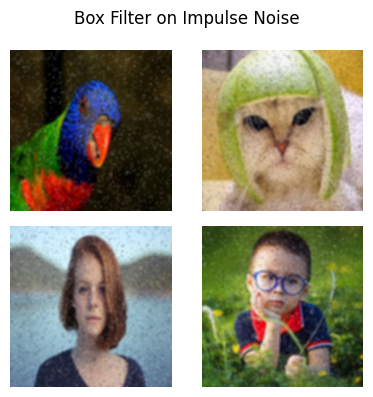

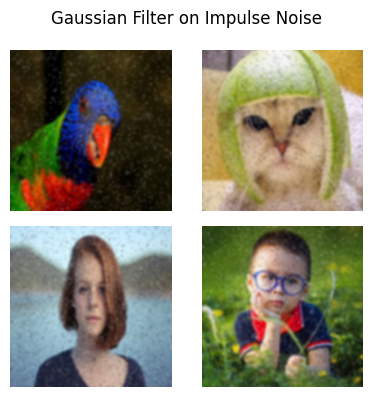

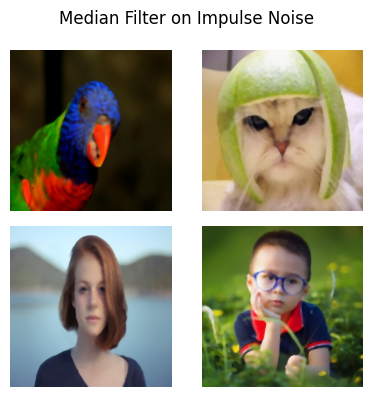

In [ ]:
# Write code here
box_filter_images_impulse       = []
gaussian_filter_images_impulse  = []
median_filter_images_impulse    = []

for image in impulse_noisy_images:
    box_filter_images_impulse.append(apply_box_filter(image, kernel_size=5))
    gaussian_filter_images_impulse.append(apply_gaussian_filter(image, kernel_size=7, sigma=2.0))
    median_filter_images_impulse.append(apply_median_filter(image, kernel_size=5))

box_filter_images_impulse = np.array(box_filter_images_impulse)
gaussian_filter_images_impulse = np.array(gaussian_filter_images_impulse)
median_filter_images_impulse = np.array(median_filter_images_impulse)

show_image_grid(box_filter_images_impulse, M=2, N=2, title='Box Filter on Impulse Noise')
show_image_grid(gaussian_filter_images_impulse, M=2, N=2, title='Gaussian Filter on Impulse Noise')
show_image_grid(median_filter_images_impulse, M=2, N=2, title='Median Filter on Impulse Noise')

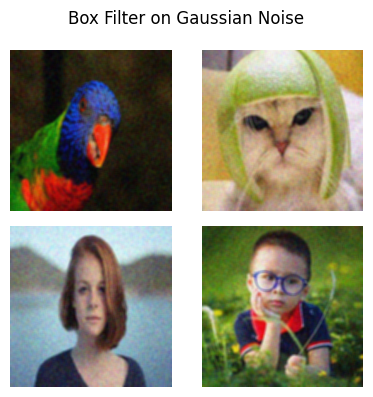

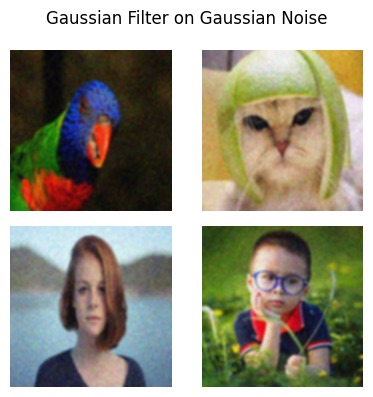

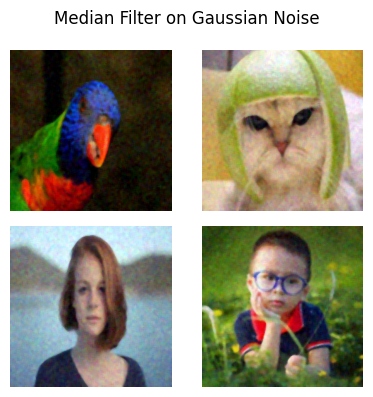

In [ ]:
# Write code here
box_filter_images_gaussian       = []
gaussian_filter_images_gaussian  = []
median_filter_images_gaussian    = []

for image in gaussian_noisy_images:
    box_filter_images_gaussian.append(apply_box_filter(image, kernel_size=5))
    gaussian_filter_images_gaussian.append(apply_gaussian_filter(image, kernel_size=7, sigma=2.0))
    median_filter_images_gaussian.append(apply_median_filter(image, kernel_size=5))

box_filter_images_gaussian = np.array(box_filter_images_gaussian)
gaussian_filter_images_gaussian = np.array(gaussian_filter_images_gaussian)
median_filter_images_gaussian = np.array(median_filter_images_gaussian)

show_image_grid(box_filter_images_gaussian, M=2, N=2, title='Box Filter on Gaussian Noise')
show_image_grid(gaussian_filter_images_gaussian, M=2, N=2, title='Gaussian Filter on Gaussian Noise')
show_image_grid(median_filter_images_gaussian, M=2, N=2, title='Median Filter on Gaussian Noise')

### Q3 [5 Marks]

Implement the Canny Edge Detector algorithm from scratch, you can use numpy library for computation operation such as convolution or sliding windows.
<br/>
Show canny edge results on the following denoised images from previous question:
* box_filter_images_impulse: [4, 256, 256, 3]
* gaussian_filter_images_impulse: [4, 256, 256, 3]
* median_filter_images_impulse: [4, 256, 256, 3]
* box_filter_images_gaussian: [4, 256, 256, 3]
* gaussian_filter_images_gaussian: [4, 256, 256, 3]
* median_filter_images_gaussian: [4, 256, 256, 3]

Total number of images in each of above array is: 4 <br/>
Each is of size H: 256, W: 256 and Channels: 3 <br/><br/>
Compare your implementation with Opencv canny edge detector method.<br/><br/>
Create a table of 6 x 4 (where 6 is all the filters and 4 is number of images) and show Root Mean Square Error between your canny edge image and opencv canny edge image.

In [ ]:
def apply_canny_edge_detector_opencv(image, threshold1, threshold2):

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply the Canny edge detector
    edges = cv2.Canny(gray_image, threshold1, threshold2)

    # This is done only for converting 1 channel image to 3 channels for
    # visualization purpose in matplotlib
    edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

    return edges


In [ ]:
def sobel_operator(image):
    """Apply Sobel operator to compute gradients."""

    sobel_x = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ], dtype=np.float64)

    sobel_y = np.array([
        [-1, -2, -1],
        [0, 0, 0],
        [1, 2, 1]
    ], dtype=np.float64)

    grad_x = convolve2d(image, sobel_x, mode='same', boundary='wrap')
    grad_y = convolve2d(image, sobel_y, mode='same', boundary='wrap')

    return grad_x, grad_y

def non_max_suppression(grad_x, grad_y):
    """Apply non-maximum suppression to thin the edges."""

    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    angle = np.arctan2(grad_y, grad_x) * (180.0 / np.pi)
    angle[angle < 0] += 180

    output = np.zeros_like(magnitude, dtype=np.float64)

    # Quantize angles to 0, 45, 90, 135 degrees
    angle = np.round(angle / 45) * 45

    for i in range(1, magnitude.shape[0] - 1):
        for j in range(1, magnitude.shape[1] - 1):
            # Get current pixel and neighboring pixels based on angle
            if (0 <= angle[i, j] < 45) or (angle[i, j] == 180):
                q = magnitude[i, j + 1]
                r = magnitude[i, j - 1]
            elif 45 <= angle[i, j] < 90:
                q = magnitude[i + 1, j - 1]
                r = magnitude[i - 1, j + 1]
            elif 90 <= angle[i, j] < 135:
                q = magnitude[i + 1, j]
                r = magnitude[i - 1, j]
            elif 135 <= angle[i, j] < 180:
                q = magnitude[i - 1, j - 1]
                r = magnitude[i + 1, j + 1]

            # Suppression condition
            if magnitude[i, j] >= q and magnitude[i, j] >= r:
                output[i, j] = magnitude[i, j]
            else:
                output[i, j] = 0

    return output

def hysteresis_thresholding(image, low_thresh, high_thresh):
    """Apply hysteresis thresholding."""

    strong = 255
    weak = 75

    result = np.zeros_like(image, dtype=np.uint8)

    # Strong and weak edges
    strong_edges = (image >= high_thresh)
    weak_edges = (image >= low_thresh) & (image < high_thresh)

    result[strong_edges] = strong
    result[weak_edges] = weak

    # Perform edge tracking by hysteresis
    M, N = result.shape
    for i in range(1, M - 1):
        for j in range(1, N - 1):
            if result[i, j] == weak:
                if np.any(result[i - 1:i + 2, j - 1:j + 2] == strong):
                    result[i, j] = strong
                else:
                    result[i, j] = 0

    return result

def apply_canny_edge_detector_self(image, threshold1, threshold2):

    """Perform Canny Edge Detection without Gaussian Blur."""

     # Ensure the image is in float format for precision
    if len(image.shape) == 3:
        # Convert color image to grayscale
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    image = image.astype(np.float64)

    # Ensure the image is in float format for precision
    image = image.astype(np.float64)

    # Apply Sobel operator
    grad_x, grad_y = sobel_operator(image)

    # Apply non-maximum suppression
    suppressed = non_max_suppression(grad_x, grad_y)

    # Apply hysteresis thresholding
    edges_g = hysteresis_thresholding(suppressed, low_thresh=threshold1, high_thresh=threshold2)

    # Convert to BGR format for visualization purposes
    edges = cv2.cvtColor(edges_g, cv2.COLOR_GRAY2BGR)

    return edges


In [ ]:
threshold1 = 80
threshold2 = 180

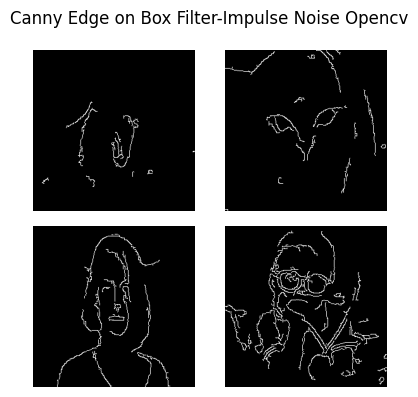

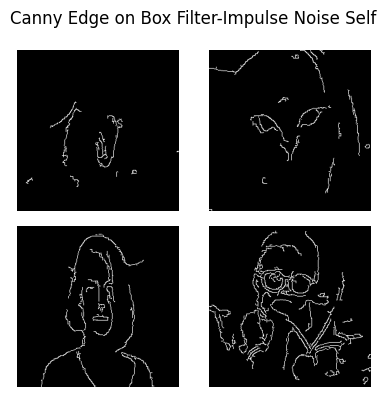

In [ ]:
canny_edge_opencv_box_filter_images_impulse = []
canny_edge_self_box_filter_images_impulse = []

for image in box_filter_images_impulse:
    canny_edge_opencv_box_filter_images_impulse.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    canny_edge_self_box_filter_images_impulse.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_opencv_box_filter_images_impulse = np.array(canny_edge_opencv_box_filter_images_impulse)
canny_edge_self_box_filter_images_impulse = np.array(canny_edge_self_box_filter_images_impulse)

show_image_grid(canny_edge_opencv_box_filter_images_impulse, M=2, N=2, title='Canny Edge on Box Filter-Impulse Noise Opencv')
show_image_grid(canny_edge_self_box_filter_images_impulse, M=2, N=2,  title='Canny Edge on Box Filter-Impulse Noise Self')

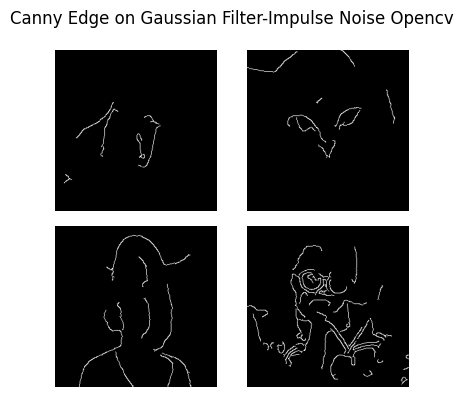

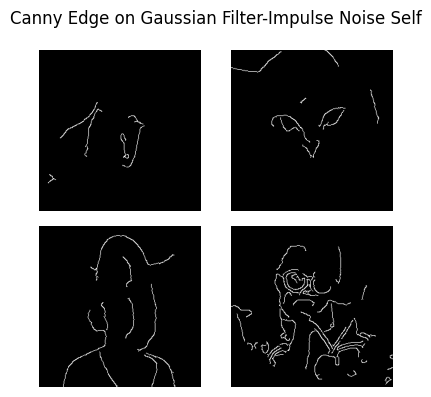

In [ ]:
canny_edge_opencv_gaussian_filter_images_impulse = []
canny_edge_self_gaussian_filter_images_impulse = []

for image in gaussian_filter_images_impulse:
    canny_edge_opencv_gaussian_filter_images_impulse.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    canny_edge_self_gaussian_filter_images_impulse.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_opencv_gaussian_filter_images_impulse = np.array(canny_edge_opencv_gaussian_filter_images_impulse)
canny_edge_self_gaussian_filter_images_impulse = np.array(canny_edge_self_gaussian_filter_images_impulse)

show_image_grid(canny_edge_opencv_gaussian_filter_images_impulse, M=2, N=2,  title='Canny Edge on Gaussian Filter-Impulse Noise Opencv')
show_image_grid(canny_edge_self_gaussian_filter_images_impulse, M=2, N=2,  title='Canny Edge on Gaussian Filter-Impulse Noise Self')

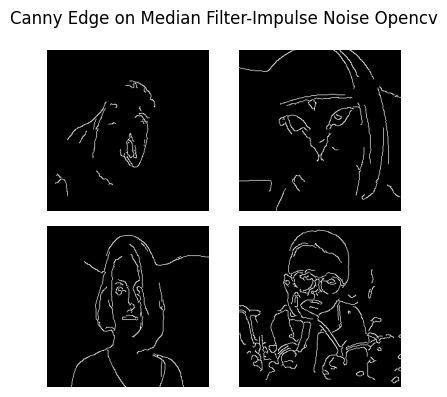

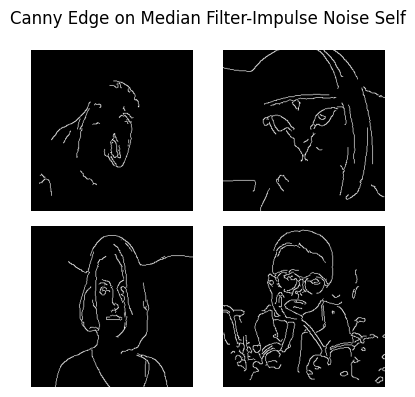

In [ ]:
canny_edge_opencv_median_filter_images_impulse = []
canny_edge_self_median_filter_images_impulse = []

for image in median_filter_images_impulse:
    canny_edge_opencv_median_filter_images_impulse.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    canny_edge_self_median_filter_images_impulse.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_opencv_median_filter_images_impulse = np.array(canny_edge_opencv_median_filter_images_impulse)
canny_edge_self_median_filter_images_impulse = np.array(canny_edge_self_median_filter_images_impulse)

show_image_grid(canny_edge_opencv_median_filter_images_impulse, M=2, N=2,  title='Canny Edge on Median Filter-Impulse Noise Opencv')
show_image_grid(canny_edge_self_median_filter_images_impulse, M=2, N=2,  title='Canny Edge on Median Filter-Impulse Noise Self')

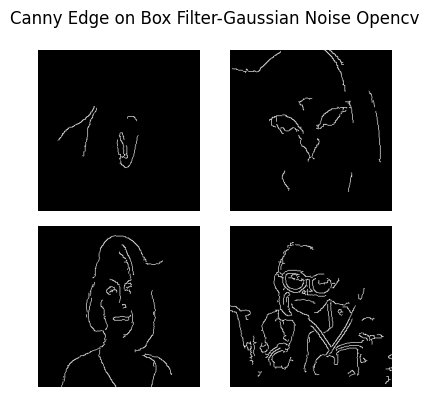

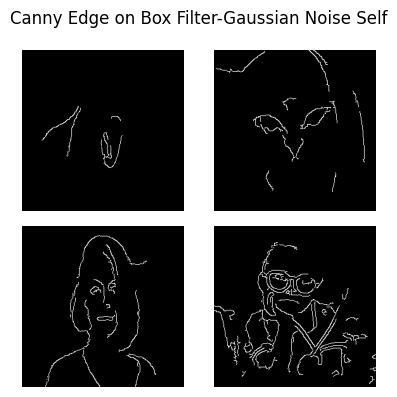

In [ ]:
canny_edge_opencv_box_filter_images_gaussian = []
canny_edge_self_box_filter_images_gaussian = []

for image in box_filter_images_gaussian:
    canny_edge_opencv_box_filter_images_gaussian.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    canny_edge_self_box_filter_images_gaussian.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_opencv_box_filter_images_gaussian = np.array(canny_edge_opencv_box_filter_images_gaussian)
canny_edge_self_box_filter_images_gaussian = np.array(canny_edge_self_box_filter_images_gaussian)

show_image_grid(canny_edge_opencv_box_filter_images_gaussian, M=2, N=2,  title='Canny Edge on Box Filter-Gaussian Noise Opencv')
show_image_grid(canny_edge_self_box_filter_images_gaussian, M=2, N=2,  title='Canny Edge on Box Filter-Gaussian Noise Self')

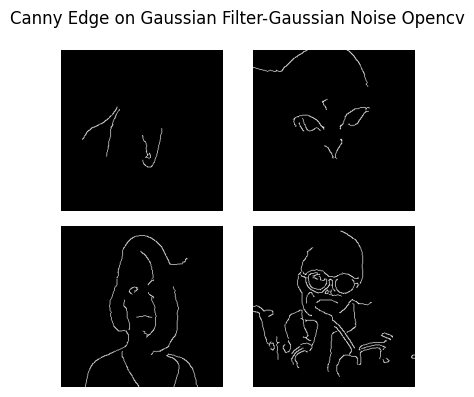

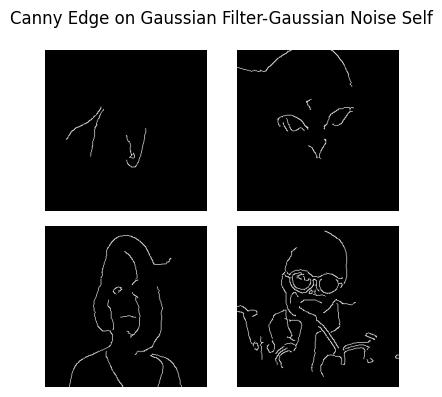

In [ ]:
canny_edge_opencv_gaussian_filter_images_gaussian = []
canny_edge_self_gaussian_filter_images_gaussian = []

for image in gaussian_filter_images_gaussian:
    canny_edge_opencv_gaussian_filter_images_gaussian.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    canny_edge_self_gaussian_filter_images_gaussian.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_opencv_gaussian_filter_images_gaussian = np.array(canny_edge_opencv_gaussian_filter_images_gaussian)
canny_edge_self_gaussian_filter_images_gaussian = np.array(canny_edge_self_gaussian_filter_images_gaussian)

show_image_grid(canny_edge_opencv_gaussian_filter_images_gaussian, M=2, N=2,  title='Canny Edge on Gaussian Filter-Gaussian Noise Opencv')
show_image_grid(canny_edge_self_gaussian_filter_images_gaussian, M=2, N=2,   title='Canny Edge on Gaussian Filter-Gaussian Noise Self')

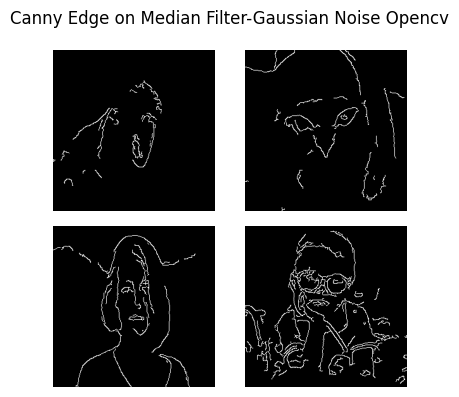

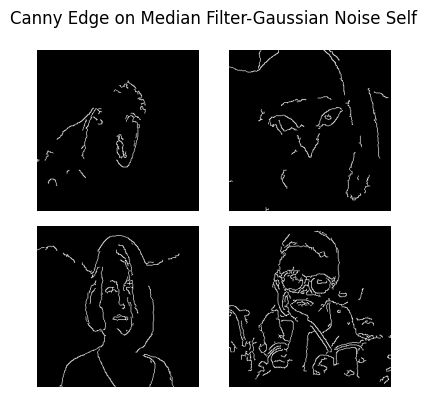

In [ ]:
canny_edge_opencv_median_filter_images_gaussian = []
canny_edge_self_median_filter_images_gaussian = []

for image in median_filter_images_gaussian:
    canny_edge_opencv_median_filter_images_gaussian.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    canny_edge_self_median_filter_images_gaussian.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_opencv_median_filter_images_gaussian = np.array(canny_edge_opencv_median_filter_images_gaussian)
canny_edge_self_median_filter_images_gaussian = np.array(canny_edge_self_median_filter_images_gaussian)

show_image_grid(canny_edge_opencv_median_filter_images_gaussian, M=2, N=2,   title='Canny Edge on Median Filter-Gaussian Noise Opencv')
show_image_grid(canny_edge_self_median_filter_images_gaussian, M=2, N=2,   title='Canny Edge on Median Filter-Gaussian Noise Self')

In [ ]:
####
# RMSE table of size 6 x 4
###

In [ ]:
pip install tabulate


In [ ]:
import pandas as pd
from tabulate import tabulate

def calculate_rmse(image1, image2):
    """Calculate the Root Mean Squared Error between two images."""

    # Convert images to grayscale if they are not already
    if len(image1.shape) == 3:
        image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    if len(image2.shape) == 3:
        image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    image1 = image1.astype(np.float64)
    image2 = image2.astype(np.float64)

    mse = np.mean((image1 - image2) ** 2)
    rmse = np.sqrt(mse)

    return rmse


# Compute Canny edges using OpenCV

canny_edge_opencv_images = {
    'box_filter_impulse': [apply_canny_edge_detector_opencv(image, threshold1=80, threshold2=180) for image in box_filter_images_impulse],
    'gaussian_filter_impulse': [apply_canny_edge_detector_opencv(image, threshold1=80, threshold2=180) for image in gaussian_filter_images_impulse],
    'median_filter_impulse': [apply_canny_edge_detector_opencv(image, threshold1=80, threshold2=180) for image in median_filter_images_impulse],
    'box_filter_gaussian': [apply_canny_edge_detector_opencv(image, threshold1=80, threshold2=180) for image in box_filter_images_gaussian],
    'gaussian_filter_gaussian': [apply_canny_edge_detector_opencv(image, threshold1=80, threshold2=180) for image in gaussian_filter_images_gaussian],
    'median_filter_gaussian': [apply_canny_edge_detector_opencv(image, threshold1=80, threshold2=180) for image in median_filter_images_gaussian]
}

# Compute Canny edges using self implementation

canny_edge_self_images = {
    'box_filter_impulse': [apply_canny_edge_detector_self(image, threshold1=80, threshold2=180) for image in box_filter_images_impulse],
    'gaussian_filter_impulse': [apply_canny_edge_detector_self(image, threshold1=80, threshold2=180) for image in gaussian_filter_images_impulse],
    'median_filter_impulse': [apply_canny_edge_detector_self(image, threshold1=80, threshold2=180) for image in median_filter_images_impulse],
    'box_filter_gaussian': [apply_canny_edge_detector_self(image, threshold1=80, threshold2=180) for image in box_filter_images_gaussian],
    'gaussian_filter_gaussian': [apply_canny_edge_detector_self(image, threshold1=80, threshold2=180) for image in gaussian_filter_images_gaussian],
    'median_filter_gaussian': [apply_canny_edge_detector_self(image, threshold1=80, threshold2=180) for image in median_filter_images_gaussian]
}

# Initialize RMSE storage
rmse_table = np.zeros((6, 4))

# Define filter names and image categories
filter_names = ['box_filter_impulse', 'gaussian_filter_impulse', 'median_filter_impulse',
                 'box_filter_gaussian', 'gaussian_filter_gaussian', 'median_filter_gaussian']
image_categories = range(4)  # 4 images per filter

# Compute RMSE for each filter and each image

for i, filter_name in enumerate(filter_names):
    for j in image_categories:
        opencv_image = canny_edge_opencv_images[filter_name][j]
        self_image = canny_edge_self_images[filter_name][j]
        rmse_table[i, j] = calculate_rmse(opencv_image, self_image)

# Convert RMSE table to DataFrame for better visualization
df_rmse = pd.DataFrame(rmse_table, index=filter_names, columns=[f'Image {i+1}' for i in image_categories])

# Convert DataFrame to tabulate format
table = tabulate(df_rmse, headers='keys', tablefmt='fancy_grid', showindex=True)

# Print formatted table
print("**RMSE Table**\n")
print(table)


**RMSE Table**

╒══════════════════════════╤═══════════╤═══════════╤═══════════╤═══════════╕
│                          │   Image 1 │   Image 2 │   Image 3 │   Image 4 │
╞══════════════════════════╪═══════════╪═══════════╪═══════════╪═══════════╡
│ box_filter_impulse       │   24.4601 │   31.5465 │   36.7476 │   54.4217 │
├──────────────────────────┼───────────┼───────────┼───────────┼───────────┤
│ gaussian_filter_impulse  │   19.797  │   23.9477 │   29.3468 │   45.9932 │
├──────────────────────────┼───────────┼───────────┼───────────┼───────────┤
│ median_filter_impulse    │   26.8945 │   38.2298 │   34.7493 │   51.969  │
├──────────────────────────┼───────────┼───────────┼───────────┼───────────┤
│ box_filter_gaussian      │   19.3406 │   30.3114 │   33.7498 │   50.4185 │
├──────────────────────────┼───────────┼───────────┼───────────┼───────────┤
│ gaussian_filter_gaussian │   17.1374 │   23.4241 │   30.7662 │   44.9237 │
├──────────────────────────┼───────────┼───────────┼────────



*   Best Performance: The **Gaussian Filter Gaussian**
method has the lowest RMSE values, indicating superior accuracy across all images.

*   Good Performance: **Gaussian Filter Impulse** and **Box Filter Gaussian** also show relatively low RMSE values.


*   Less Effective: **Box Filter Impulse** and **Median Filter Gaussian** have higher RMSE values, suggesting less accurate results.

